# Palmer Penguins Modeling

Import the Palmer Penguins dataset and print out the first few rows.

Suppose we want to predict `bill_depth_mm` using the other variables in the dataset.

**Dummify** all variables that require this.

In [1]:
!pip install palmerpenguins
import pandas as pd
from palmerpenguins import load_penguins
import sklearn
from sklearn import *

In [11]:
penguins = load_penguins()
penguins_clean = penguins.dropna()
penguins_dummies = pd.get_dummies(penguins_clean,
                                  columns=['species', 'island', 'sex', 'year'],
                                  drop_first= True)
penguins = penguins_dummies
penguins.head()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,species_Chinstrap,species_Gentoo,island_Dream,island_Torgersen,sex_male,year_2008,year_2009
0,39.1,18.7,181.0,3750.0,0,0,0,1,1,0,0
1,39.5,17.4,186.0,3800.0,0,0,0,1,0,0,0
2,40.3,18.0,195.0,3250.0,0,0,0,1,0,0,0
4,36.7,19.3,193.0,3450.0,0,0,0,1,0,0,0
5,39.3,20.6,190.0,3650.0,0,0,0,1,1,0,0


Let's use the other variables to predict `bill_depth_mm`. Prepare your data and fit the following models on a training dataset subset of the entire dataset:

* Four different models, each containing a different set of predictor variables

Create a plot like the right plot of Fig 1. in our `Model Validation` chapter with the training and test error plotted for each of your four models.

Which of your models was best?

In [14]:
# Preparing training and test data
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [18]:
# Model 1

X = penguins[['bill_length_mm']]
y = penguins['bill_depth_mm']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

# One predictor model
lr = LinearRegression()
model_1 = lr.fit(X_train, y_train)

# Predictions
predict_1 = model_1.predict(X_test)

# R squared value
model_1_R2 = r2_score(y_test, predict_1)
model_1_R2

0.018282082702929525

In [22]:
# Model 2

X_2 = penguins[['sex_male', 'flipper_length_mm']]

X_train, X_test, y_train, y_test = train_test_split(X_2, y, test_size = 0.25)

# Two predictor model
lr = LinearRegression()
model_2 = lr.fit(X_train, y_train)

# Predictions
predict_2 = model_2.predict(X_test)

# R squared value
model_2_R2 = r2_score(y_test, predict_2)
model_2_R2

0.6176123729049585

In [23]:
# Model 3

X_3 = penguins[['body_mass_g', 'year_2008', 'island_Torgersen']]

X_train, X_test, y_train, y_test = train_test_split(X_3, y, test_size = 0.25)

# Three predictor model
lr = LinearRegression()
model_3 = lr.fit(X_train, y_train)

# Predictions
predict_3 = model_3.predict(X_test)

# R squared value
model_3_R2 = r2_score(y_test, predict_3)
model_3_R2

0.1657260580613259

In [24]:
# Model 4

X_4 = penguins[['bill_length_mm', 'flipper_length_mm', 'body_mass_g', 'sex_male']]

X_train, X_test, y_train, y_test = train_test_split(X_4, y, test_size = 0.25)

# Four predictor model
lr = LinearRegression()
model_4 = lr.fit(X_train, y_train)

# Predictions
predict_4 = model_4.predict(X_test)

# R squared value
model_4_R2 = r2_score(y_test, predict_4)
model_4_R2

0.7136198579921141

In [26]:
# R squared values for each of the models

R_sq_df = pd.DataFrame({"R^2": [model_1_R2,
                                model_2_R2,
                                model_3_R2,
                                model_4_R2],
                        "# of Predictors": [1,2,3,4]})
R_sq_df

,R^2,# of Predictors
0,0.018282,1
1,0.617612,2
2,0.165726,3
3,0.713620,4


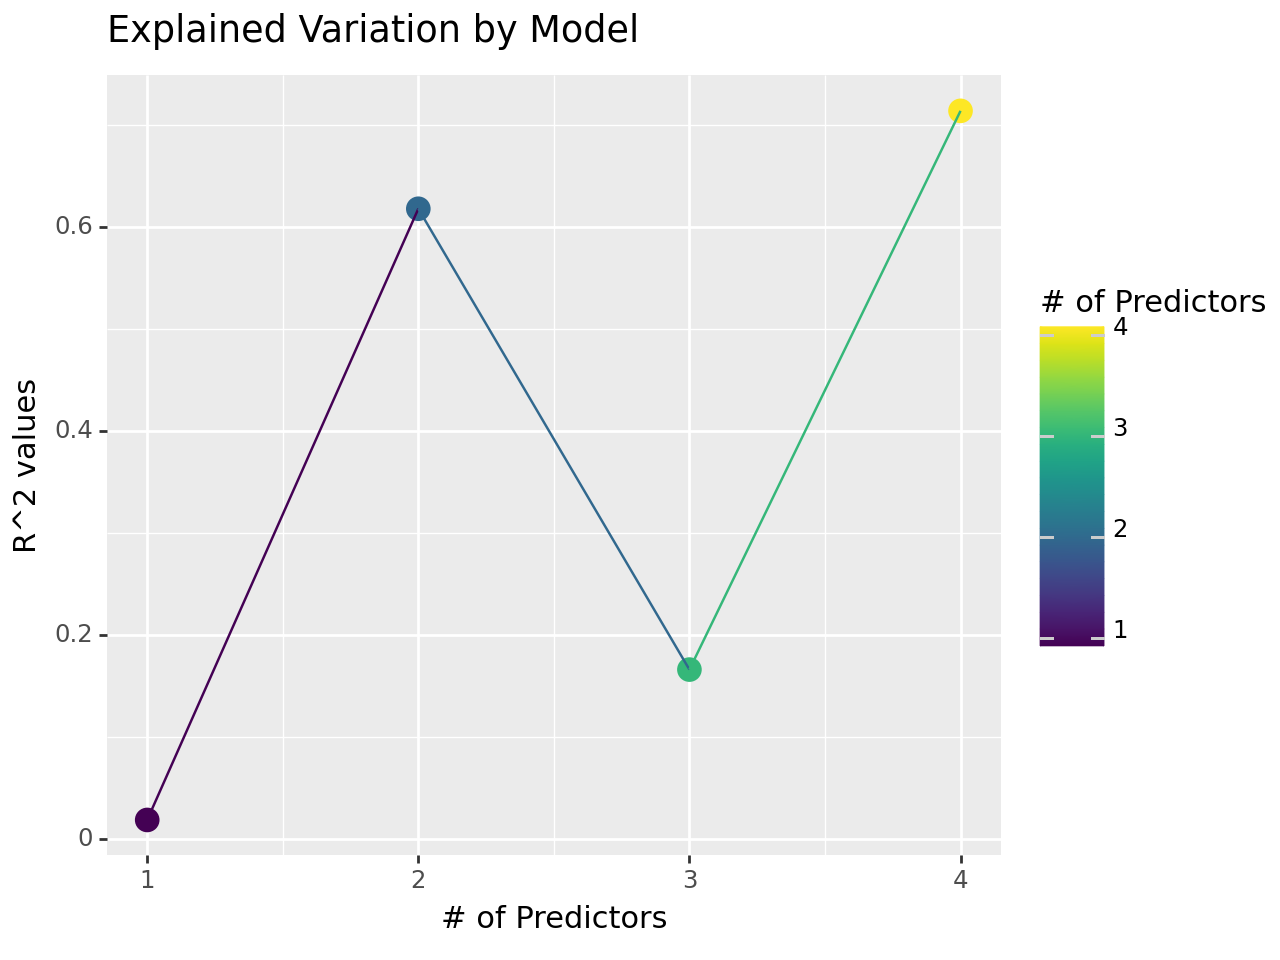

<Figure Size: (640 x 480)>

In [32]:
# Creating a graph to compare the models performances

from plotnine import *

(ggplot(R_sq_df, aes(x = "# of Predictors",
                     y = "R^2",
                     color = "# of Predictors"))
+ geom_point(size = 4)
+ geom_line()
+ labs(x = "# of Predictors",
       y = "R^2 values",
       title = "Explained Variation by Model")
 )

Model 4 performed the best with predictors: 'bill_length_mm', 'flipper_length_mm', 'body_mass_g', 'sex_male'. With an R squared value of 0.714, the model was able to explain 71.4% of the variation in the data.